In [1]:
import os
import json
import cv2
import chemschematicresolver as csr
from matplotlib import pyplot as plt
from skimage import io
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.molSize = 500,500

#set up drawing fonts
from rdkit.Chem.Draw import DrawingOptions
DOptions = DrawingOptions()
DOptions.atomLabelMinFontSize = 15
DOptions.atomLabelFontSize = 18

RDKit WARNING: [06:29:56] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
# load results
raw_image_result = "Seaki_Elsevier_raw_image_detections.json"
enhanced_raw_image_result = "Seaki_Elsevier_enhanced_raw_image_detections.json"

OD_train_image_result  = "Seaki_Elsevier_OD_image_train.json"
OD_test_image_result   = "Seaki_Elsevier_OD_image_test.json"

enhanced_OD_train_image_result = "Seaki_Elsevier_enhanced_OD_image_train.json"
enhanced_OD_test_image_result  = "Seaki_Elsevier_enhanced_OD_image_test.json"

In [8]:
def show_results_in_parallel(results):
    counter = 0
    for image_f, smile in results.items():
        print("image at:", image_f)
        
        image = cv2.imread(image_f)
        
        for si in smile:
            fig, axs = plt.subplots(1, 2, figsize=(15,15))
            
            print("smile label:  ", si[0])
            print("smile result: ", si[1])
            axs[0].imshow(image, cmap='gray')
            
            try:
                mol = Chem.MolFromSmiles(si[1])
                #rdDepictor.Compute2DCoords(mol)
                #mol_image = Draw.MolToImage(mol, size=(500,500))
                Draw.MolToFile(mol,'./temp_mol.png', size=(500, 500), fitImage=True, options=DOptions)
                mol_image = cv2.imread('./temp_mol.png')
                axs[1].imshow(mol_image)
            except:
                print("draw molecule failed")
                pass
            
            counter += 1
            yield counter 
    

In [9]:
result = json.load(open(raw_image_result, 'r'))
len(result)

74

In [10]:
comparator = show_results_in_parallel(result)

image at: ./elsevier_images/train/image/114_sc1.jpeg
smile label:   ['2']
smile result:  C1=C(C=CC(C1)N(c1ccc(C2=CC3=C(C=C(C4C3NSN4)C(C3=CCCCC3)C)C3NSNC23)cc1)c1ccc(C(c2ccccc2)C)cc1)CC


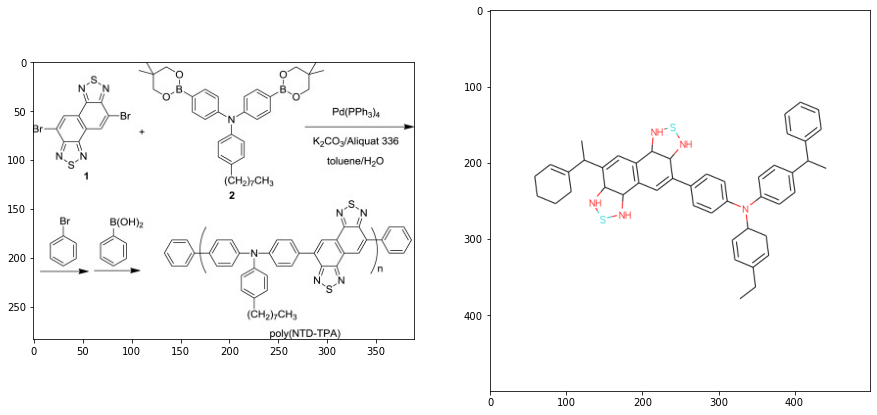

In [11]:
total_detection = next(comparator)

In [7]:
total_detection

1